In [18]:
import pandas as pd
import numpy as np
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lung_df = pd.read_csv('../data/lung_disease_clean.csv')

print(lung_df['Gender'].unique())
print(lung_df['Smoking Status'].unique())
print(lung_df['Recovered'].unique())



In [ ]:
# Convert to binary for modeling
lung_df['Gender'] = lung_df['Gender'].map({'Male': 1, 'Female': 0})
lung_df['Smoking Status'] = lung_df['Smoking Status'].map({'Yes': 1, 'No': 0})
lung_df['Recovered'] = lung_df['Recovered'].map({'Yes': 1, 'No': 0})


In [ ]:
print(lung_df[['Gender', 'Smoking Status', 'Recovered']].isnull().sum())
print(lung_df[['Gender', 'Smoking Status', 'Recovered']].dtypes)


In [ ]:
# Create dummy variables
disease_dummies = pd.get_dummies(lung_df['Disease Type'], prefix='Disease', drop_first=True)
treatment_dummies = pd.get_dummies(lung_df['Treatment Type'], prefix='Treatment', drop_first=True)
# Concatenate the dummy variables with the original DataFrame
lung_df = pd.concat([lung_df, disease_dummies, treatment_dummies], axis=1)
# Drop the original categorical columns
lung_df.drop(['Disease Type', 'Treatment Type'], axis=1, inplace=True)

print(lung_df.columns)


In [ ]:
lung_df.isnull().sum()

In [ ]:
##Logistic Regression Model

In [21]:
##Test/Train Split

y = lung_df['Recovered']


feature_cols = [
    'Age', 'Lung Capacity', 'Hospital Visits',
    'Gender', 'Smoking Status',
    'Disease_Bronchitis', 'Disease_COPD', 'Disease_Lung Cancer', 'Disease_Pneumonia',
    'Treatment_Surgery', 'Treatment_Therapy'
]
X = lung_df[feature_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



In [23]:
##Model Training
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.5472186287192755
Precision: 0.5474452554744526
Recall: 0.5784061696658098
F1 Score: 0.5625
ROC AUC: 0.5467611932305055


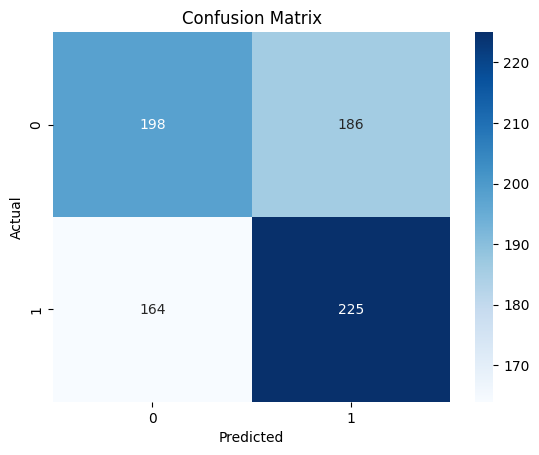

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('../output/confusion_matrix_logreg.png')


In [ ]:
##Random Forest Model

Accuracy: 0.48771021992238034
Precision: 0.4909090909090909
Recall: 0.48586118251928023
F1 Score: 0.4883720930232558
ROC AUC: 0.51680323479006


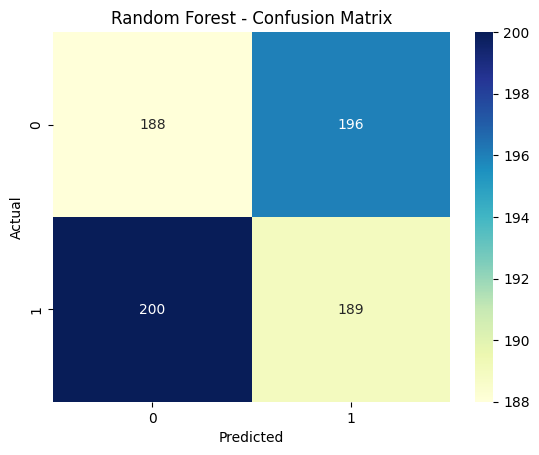

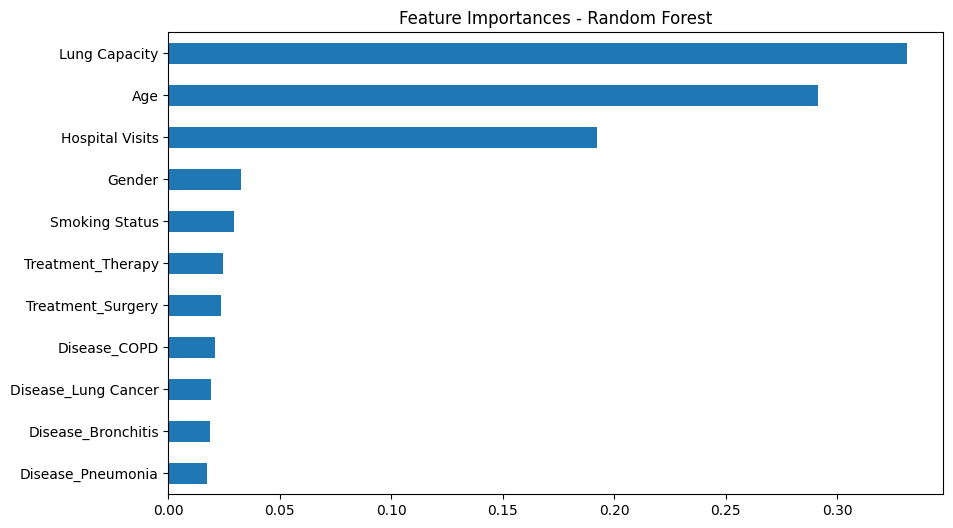

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # For ROC AUC

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_probs))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('../output/confusion_matrix_randomforest.png')



# Feature Importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.show()
plt.savefig('../output/random_forest_feature_importance.png')


